Project Goal: Use King County House Sales dataset to predict house selling prices. This will involve cleaning the data, exploring it and then predicting the target using multiple linear regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# first, inspect the data for distribution, data types and null values

#import data
kc_house_data_original = pd.read_csv("kc_house_data.csv")
kc_house_data = kc_house_data_original.copy()
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


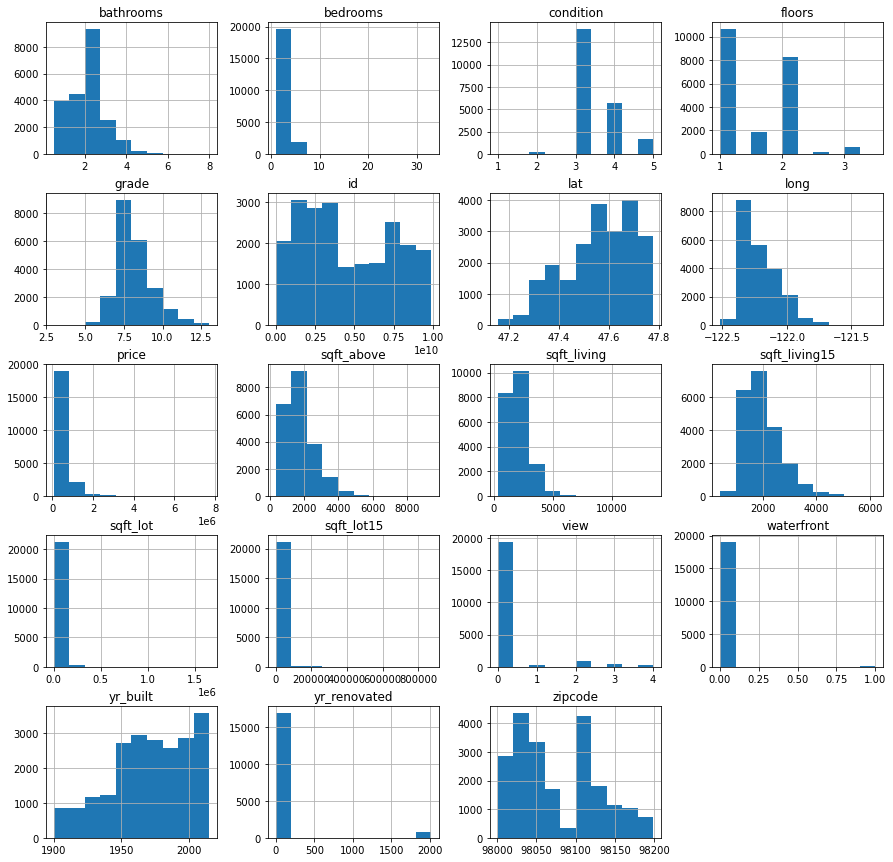

In [2]:
# visualize histogram of all data to understand predictors

kc_house_data.hist(figsize=(15,15));

INTERPRETATION

DISTRIBUTIONS:
very close to normally distributed: 
bathrooms(slight +ve skew), condition (slight -ve skew), floors (slight -ve skew), grade, lat (slight -ve skew), long (slight +ve skew), price(slight +ve skew), sqt_above (slight +ve skew), sqt_living (slight +ve skew), sqt_living15 (slight +ve skew), view (+ve skew), yr_built(slight negative skew)

unclear: 
sqt_lot (due to narrow scale), sqt_lot15 (due to narrow scale), yr_renovated (due to narrow scale)

not normal at all: 
waterfront, zipcode (multi-modal)

CATEGORICAL VARIABLES:
view, waterfront,condition


Additional note: distributions also do not show the presence of extreme values which could be indicative of a numerical number using to denote a missing values (apart from year renovated).



In [3]:
#Now inspect datatypes

kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# stats of data
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# basement squarefoot should be an integer and not a string

# unqiue values shows there's a non integer value (?) in the column
print(kc_house_data["sqft_basement"].unique())

['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660.0'
 '1220.0' '900.0' '420.0' '1580.0' '1380.0' '475.0' '690.0' '270.0'
 '350.0' '935.0' '1370.0' '980.0' '1470.0' '160.0' '950.0' '50.0' '740.0'
 '1780.0' '1900.0' '340.0' '470.0' '370.0' '140.0' '1760.0' '130.0'
 '520.0' '890.0' '1110.0'

In [6]:
#count how many ? in the column
print("""Number of "?" columns: """,len(kc_house_data[kc_house_data["sqft_basement"]=="?"]))

print("% of total columns: ", (len(kc_house_data[kc_house_data["sqft_basement"]=="?"])/len(kc_house_data))*100)

Number of "?" columns:  454
% of total columns:  2.1021438162707784


In [7]:
# i will delete theese values as they comprise only 2% of the total data
kc_house_data = kc_house_data[kc_house_data["sqft_basement"] !="?"]

#count how many ? in the column
print("""Number of "?" columns: """,len(kc_house_data[kc_house_data["sqft_basement"]=="?"]))

print("% of total columns: ", (len(kc_house_data[kc_house_data["sqft_basement"]=="?"])/len(kc_house_data))*100)

print(kc_house_data.head())

Number of "?" columns:  0
% of total columns:  0.0
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zip

In [8]:
# now change sqt_basement col to float

kc_house_data["sqft_basement"] = kc_house_data["sqft_basement"].astype(float)

kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

<ipython-input-8-1969f5c3d3d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_house_data["sqft_basement"] = kc_house_data["sqft_basement"].astype(float)


In [9]:
# next check for null values in each column
#for col in kc_house_data.columns:
print("Before deletion: ")
print(kc_house_data.isnull().sum(axis=0))

# based on output below, i will delete null values of view as there are only 61 of them
# However, both water_front and yr_renovated represent over 10% each of total observations and I will explore a different
#approach to deal with null values
kc_house_data.dropna(subset=["view"],inplace=True)

print("-----------------------------------------------")
print("After deletion: ")
print(kc_house_data.isnull().sum(axis=0))

Before deletion: 
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
-----------------------------------------------
After deletion: 
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2333
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sq

<ipython-input-9-26d980945bba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_house_data.dropna(subset=["view"],inplace=True)


In [10]:
# lets take a look at the unique values in waterfront and yr_renovated to see how to deal with missing values

for col in ["waterfront", "yr_renovated"]:
    print(kc_house_data[col].unique())
    
# I could handle this with coarse classification. However, I will leave this columns out of the model for now 
# to prevent noise

[nan  0.  1.]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 2001. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


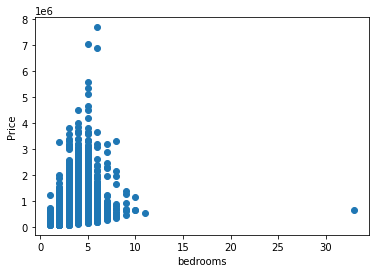

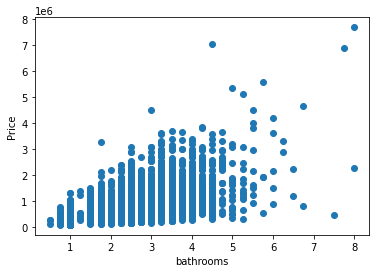

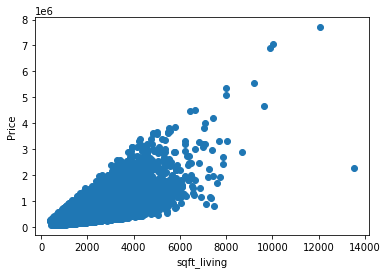

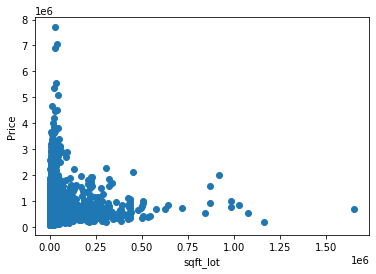

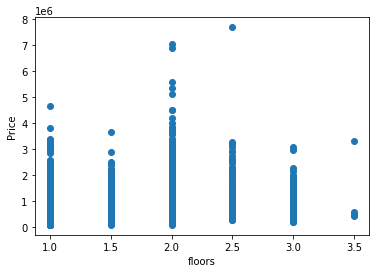

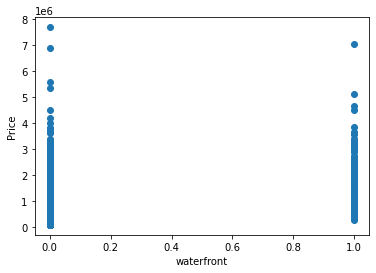

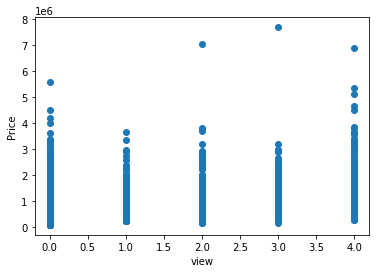

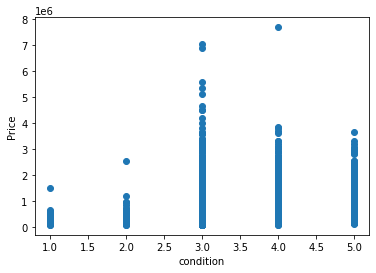

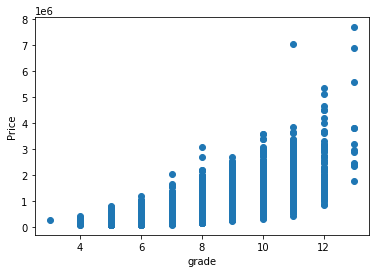

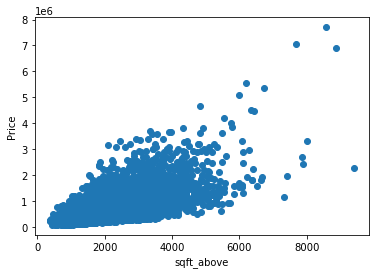

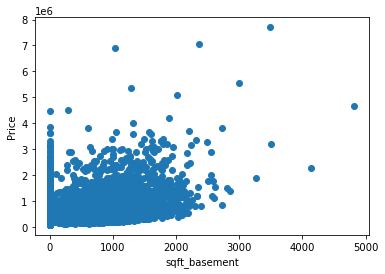

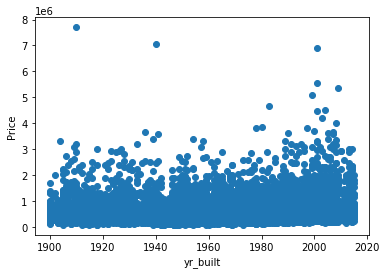

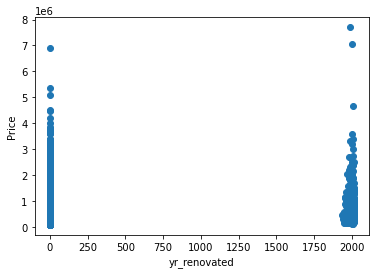

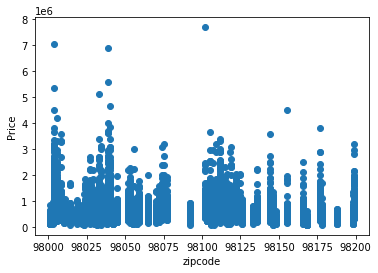

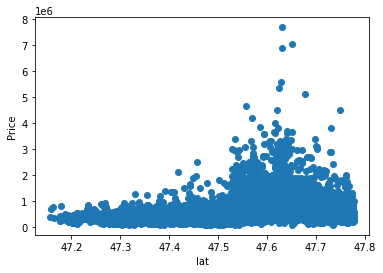

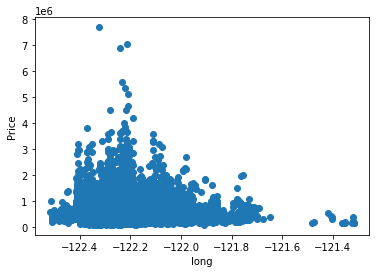

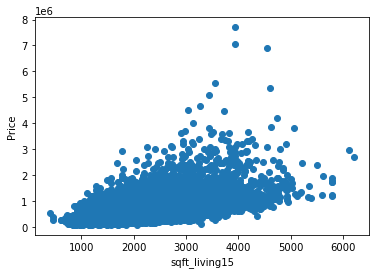

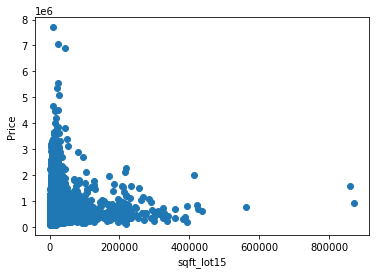

In [11]:
# next let me investigate the relationships between variable and price

for col in kc_house_data.columns:
    if col not in ["id", "date","price"]:
        plt.scatter(kc_house_data[col], kc_house_data["price"])
        plt.ylabel("Price")
        plt.xlabel(col)
        plt.show()

Only strong correlation: grade

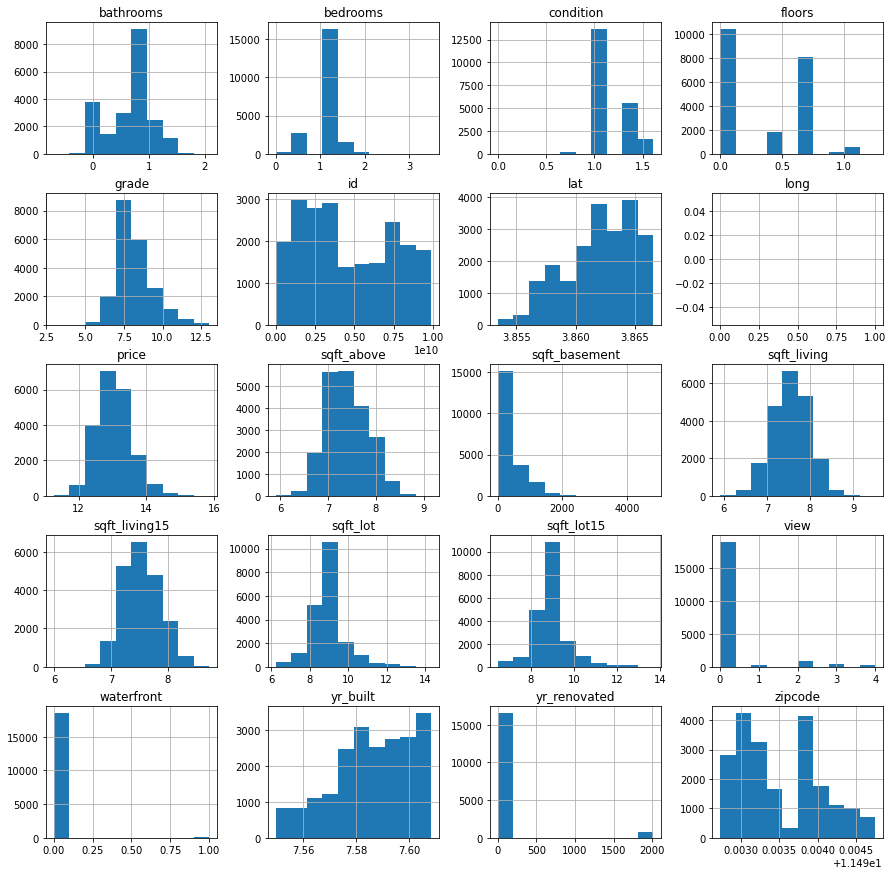

In [17]:
# Next, change skewed data to log normal distributions 
data = kc_house_data.copy()
for col in data.columns:
    
    # skip non-integer/string columns
    # skip sqft_basement, view, waterfront,yr_renovated as gives error in log transformation due to 0 values
    if col not in ["id", "date", "grade", "sqft_basement","view","waterfront","yr_renovated"]:
        # change data type to float to work with log function
        data[col] = data[col].astype(float)
        data[col] = np.log(data[col])

data.hist(figsize=(15,15));

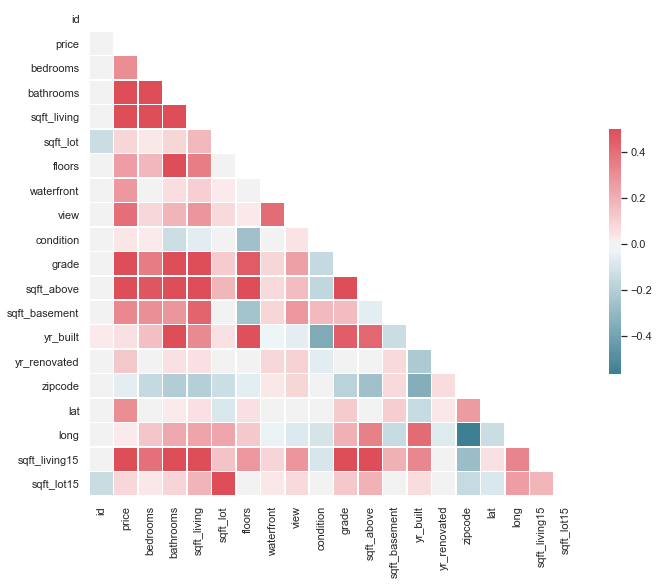

In [23]:
# next check for multicollinearity in the data within dependent variables


import seaborn as sns

sns.set(style="white")
corr = kc_house_data.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [22]:
print(kc_house_data.corr())

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016413  0.002267   0.005873    -0.011866 -0.132412   
price         -0.016413  1.000000  0.308454   0.525029     0.702004  0.088400   
bedrooms       0.002267  0.308454  1.000000   0.513694     0.577696  0.032531   
bathrooms      0.005873  0.525029  0.513694   1.000000     0.754793  0.088451   
sqft_living   -0.011866  0.702004  0.577696   0.754793     1.000000  0.173266   
sqft_lot      -0.132412  0.088400  0.032531   0.088451     0.173266  1.000000   
floors         0.019150  0.256603  0.178518   0.503796     0.354260 -0.007745   
waterfront    -0.004114  0.272661 -0.001839   0.065559     0.108855  0.022598   
view           0.012859  0.397176  0.080379   0.187249     0.283797  0.072668   
condition     -0.023410  0.034613  0.025652  -0.128167    -0.061626 -0.009207   
grade          0.008765  0.668099  0.356418   0.665992     0.762719  0.113801   
sqft_above    -0.010757  0.6

High correlation variables: sqt_living:bathrooms, sqt_living:grade, sqt_living:sqt_living15, sqft_lot:sqft_lot15, 
grade:sqft_above, sqft_living:sqft_above
        
Out of correlated dependent variables, I will include those which have strongest linear relationship with price:
sqft_living, sqft_lot

In [32]:
# also dropped waterfront and yr_renovated as most houses do not have a waterfront. While yr_renovated has too many missing values

kc_house_data_trim = kc_house_data.drop(["id", "bathrooms", "date","grade", "sqft_living15", "sqft_lot15", "sqft_above", "waterfront","yr_renovated"], axis=1)

kc_house_data_trim

,price,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0.0,3,0.0,1955,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0.0,3,400.0,1951,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0.0,3,0.0,1933,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0.0,5,910.0,1965,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0.0,3,0.0,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,1530,1131,3.0,0.0,3,0.0,2009,98103,47.6993,-122.346
21593,400000.0,4,2310,5813,2.0,0.0,3,0.0,2014,98146,47.5107,-122.362
21594,402101.0,2,1020,1350,2.0,0.0,3,0.0,2009,98144,47.5944,-122.299
21595,400000.0,3,1600,2388,2.0,0.0,3,0.0,2004,98027,47.5345,-122.069


In [35]:

kc_house_data_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21082 non-null  float64
 1   bedrooms       21082 non-null  int64  
 2   sqft_living    21082 non-null  int64  
 3   sqft_lot       21082 non-null  int64  
 4   floors         21082 non-null  float64
 5   view           21082 non-null  float64
 6   condition      21082 non-null  int64  
 7   sqft_basement  21082 non-null  float64
 8   yr_built       21082 non-null  int64  
 9   zipcode        21082 non-null  int64  
 10  lat            21082 non-null  float64
 11  long           21082 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.7 MB


Next i will build the optimal multiple regression model using forward stepwise regression

In [38]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

feature_columns = [feature for feature in kc_house_data_trim.columns if feature != "price"]
X = kc_house_data_trim[feature_columns]
y = kc_house_data_trim["price"]

# stores optimal model for each number of variables
chosen_models = []

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# find the RSS for the given feature_set
def processSubset(feature_set):
    """ finds the linear regression model and RSS for the given feature set"""
    # Fit model on feature_set and calculate RSS
    
    # add in a column of ones as intercept
    X_t = sm.add_constant(X_train[list(feature_set)])
    model = sm.OLS(y_train, X_t)
    regression = model.fit()
    # RSS is the Residual Sum of Squares
    RSS = (regression.resid ** 2).sum()
    return {
        'model': regression,
        'RSS': RSS
    }
 
# the first model has no features added
model_features=[]

#feature columns left to explore
unexplored_features=feature_columns

def forward(model_features):
    """takes as input a list of predictors already chosen in the model
    Outputs the model that contains the best addition to the predictors"""
    #stores the results from which feature to add next
    this_iteration_models=[]
    
    #feature columns left to explore
    unexplored_features= set(feature_columns) - set(model_features)
    
    # end the method if there are no unexplored features
    if unexplored_features == set():
        return None
    
    # iterate through unexplored features to see what to add next
    for next_feature in unexplored_features:
        this_iteration_result = processSubset(model_features + [next_feature])
        this_iteration_models.append(this_iteration_result)
    
    #create dataframe of results
    models = pd.DataFrame(this_iteration_models)
    
    # now i have list of results from what to add next
    # select minimum training RSS from this_iteration_result and update model features
    best_next_feature_index = np.argmin(models["RSS"])
    
    # dictionary representing next best feature to add
    best_next_feature = models.iloc[best_next_feature_index]
    
    return best_next_feature["model"]
    
# now run the forward prediction method for all variables to find the best model for each step
for i in range(len(feature_columns)):
    # find next best model
    best_model = forward(model_features)

    #update model_features
    model_features = best_model.model.exog_names[1:]
    
    #update chosen_models
    chosen_models.append(best_model)
    
for model in chosen_models:
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.632e+04
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:01   Log-Likelihood:            -2.3415e+05
No. Observations:               16865   AIC:                         4.683e+05
Df Residuals:                   16863   BIC:                         4.683e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.945e+04   4951.859     -7.966      

all models shown above except one in each step of the forward step regression contain significant features. Now lets choose the best model features based on which has the lowest test RSS

In [46]:
# Next step involves finding test RSS for each model in my chosen models
# to identify the model with the best test RSS.

# stores the test RSS for all of chosen models
RSS_test = []

# calculate test RSS for all chosen models
for this_model in chosen_models:
 
    this_X_test = sm.add_constant(X_test[this_model.model.exog_names[1:]])
    y_test_pred = this_model.predict(this_X_test)
    RSS_test.append(sum((y_test_pred-y_test)**2))
    
# find the optimal feature set
min_test_RSS_index = np.argmin(RSS_test)

optimal_features = chosen_models[min_test_RSS_index].model.exog_names[1:]

# store optimal features in this variable
predictors_forward = optimal_features

print("Predictors selected by forward stepwise selection: ",predictors_forward)
print("-----------------------------------")
print(chosen_models[min_test_RSS_index].summary())

Predictors selected by forward stepwise selection:  ['sqft_living', 'lat', 'view', 'yr_built', 'bedrooms', 'sqft_basement', 'long', 'zipcode', 'floors', 'condition', 'sqft_lot']
-----------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2835.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:46:26   Log-Likelihood:            -2.3102e+05
No. Observations:               16865   AIC:                         4.621e+05
Df Residuals:                   16853   BIC:                         4.622e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                      

A review of the model shows the sqft_lot variable is not statistically significant, lets choose the next best model

In [48]:
del RSS_test[np.argmin(RSS_test)]

# find the optimal feature set
min_test_RSS_index = np.argmin(RSS_test)

optimal_features = chosen_models[min_test_RSS_index].model.exog_names[1:]

# store optimal features in this variable
predictors_forward = optimal_features

print("Predictors selected by forward stepwise selection: ",predictors_forward)
print("-----------------------------------")
print(chosen_models[min_test_RSS_index].summary())

Predictors selected by forward stepwise selection:  ['sqft_living', 'lat', 'view', 'yr_built', 'bedrooms', 'sqft_basement', 'long', 'zipcode', 'floors', 'condition']
-----------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3118.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:50:20   Log-Likelihood:            -2.3102e+05
No. Observations:               16865   AIC:                         4.621e+05
Df Residuals:                   16854   BIC:                         4.622e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
        

Now all independent variables are statistically significant. Also the model has a good Adj. R-squared value of 0.64